In [1]:
# Import modules
# ipython magic to plot in line
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import matplotlib
#matplotlib.style.use('ggplot')
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from astropy.io import ascii
import sklearn.metrics as skm
import pytz
import scipy
# OS interaction
import sys
import os
import glob
import time
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
# Dirs
# IN
survey_dir  = os.path.normpath(r'C:\Users\new356\Google Drive\Nov2014 Data QC Completed Data\Snow Surveys\Formated')
os.chdir(survey_dir)
survey_file ='CRHO.xlsx'
# OUT
out_dir     = os.path.normpath(r'F:\Work\e\Data\Obs\Canada_Project_Sites\Nov_2014_snow_storm_data\QC_netcdf')
cfileout    = os.path.join(out_dir,'CRHO_Snow_Survey.nc')

In [3]:
# # For each file
# for cfile in files_all:
#     # Station name
#     csta = cfile.split('.')[0]
# Read in xlsx file
df = pd.read_excel(survey_file,index_col=0,sheetname=None)

ds_list = []
station = []
# Loop through each dict
for c_df in df:
    # Convert to xarray dataset
    ds_list.append(xr.Dataset.from_dataframe(df[c_df]))
    station.append(c_df)


In [4]:
# Concat datasets
ds = xr.concat(ds_list,dim='station')
ds['station']  = station

# Rename variables
ds.rename({'SWE (mm)':'swe','Depth (cm)':'snowdepthavg','Density (kg/m3)':'density'},inplace=True)

# Set units
ds['swe'] = ds.swe / 1000 # mm to m
ds.swe.attrs = {'units':'m'}
ds['snowdepthavg'] = ds.snowdepthavg / 100 # cm to m
ds.snowdepthavg.attrs = {'units':'m'}
ds.density.attrs = {'units':'kg/m3'}

In [5]:
ds

<xarray.Dataset>
Dimensions:       (Date: 637, station: 6)
Coordinates:
  * Date          (Date) datetime64[ns] 2013-12-01 2013-12-02 2013-12-03 ...
  * station       (station) <U3 'CRG' 'CRN' 'FRS' 'FRG' 'PWL' 'BNS'
Data variables:
    snowdepthavg  (station, Date) float64 nan nan nan nan nan nan nan nan ...
    density       (station, Date) float64 nan nan nan nan nan nan nan nan ...
    swe           (station, Date) float64 nan nan nan nan nan nan nan nan ...

In [6]:
# Save to netcdf file
ds.to_netcdf(cfileout,engine='netcdf4')

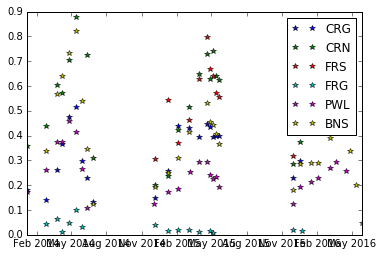

In [9]:
# Plot check
for csta in ds.station:
    plt.plot(ds.Date,ds['swe'].sel(station=csta),'*',label=csta.values)
plt.legend()

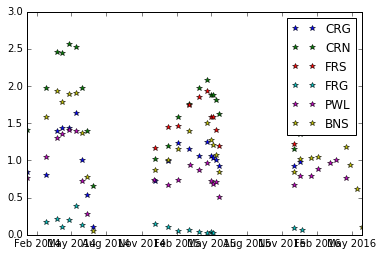

In [11]:
for csta in ds.station:
    plt.plot(ds.Date,ds['snowdepthavg'].sel(station=csta),'*',label=csta.values)
plt.legend()

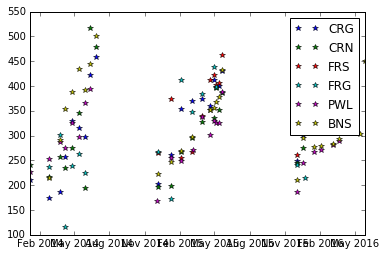

In [10]:
for csta in ds.station:
    plt.plot(ds.Date,ds['density'].sel(station=csta),'*',label=csta.values)
plt.legend()